In [113]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import spacy
from spacy import displacy

In [2]:
df = pd.read_csv('C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Text Mining\\Elon_musk.csv', encoding='latin', index_col=0)
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [3]:
df = [Text.strip() for Text in df.Text]
df = [Text for Text in df if Text]

In [4]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [5]:
df_join = ''.join(df)
df_join

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [7]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles = True)

df_tok = tokenizer.tokenize(df_join)
print(df_tok)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [8]:
df_tok_join =  ' '.join(df_tok)
df_tok_join

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

#### Removing Punctuation

In [9]:
import string
df_punc = df_tok_join.translate(str.maketrans('','',string.punctuation))
df_punc

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

#### Removing Urls

In [10]:
df_url = re.sub(r'http\S+', '', df_punc)
df_url

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Hea

#### Tokenization

In [12]:
tweet_words = word_tokenize(df_url , language = 'english', preserve_line = True)
print(tweet_words)

['I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'It', '\x92', 's', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but',

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Removing Stopwords

In [14]:
stopwords = stopwords.words('english')

In [18]:
extrastopwords = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','Ö','orÖ']
stopwords.extend(extrastopwords)



tweet_nostopwords = [words for words in tweet_words if words not in stopwords]
print(tweet_nostopwords)

['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'sucksRT', 'NASA', 'sel

#### Normalizing

In [19]:
tweets_lower = [Text.lower() for Text in tweet_nostopwords]
print(tweets_lower)

['alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'sel

#### Stemming 

In [21]:
stemmer = PorterStemmer()

In [22]:
for i in tweets_lower:
    print(stemmer.stem(i))

alien
idaacarmack
ray
trace
cyberpunk
hdr
nextlevel
have
tri
great
interview
gtera27
doge
underestim
teslacn
congratul
tesla
china
amaz
execut
last
year
now
next
even
happi
new
year
ox
underdog
all
thought
would
fail
himself
haha
thank
inde
tweet
definit
repres
realworld
time
allocationth
entertain
outcom
like
givedirectli
just
sent
somejust
agre
clubhous
tco3rwe9uhstsgeoffkeighley
it
get
realbought
dogecoin
lil
x
toddler
hodler
joshmanmod
he
definit
issu
sentenc
seem
bit
high
freewalletorg
thank
fix
freewalletorg
pleas
unlock
account
astrojordi
thi
true
power
ani
crypto
wallet
give
privat
key
avoid
cost
freewalletorg
your
app
sucksrt
nasa
select
falcon
heavi
launch
first
two
element
lunar
gateway
togeth
one
mission
blkmdl3
onc
predict
cash
flow
reason
well
starlink
ipo
rationaletienn
starlink
staggeringli
difficult
technic
econom
endeavor
howev
spacex
need
pass
deep
chasm
neg
cash
flow
next
year
lowest
cost
per
ton
carbon
sequest
net
valu
product
made
must
scalabl
g
it
meant
price
cou

team
achiev
major
mileston
at
start
tesla
thought
optimistica
in
2020
produc
deliv
half
million
car
huge
thank
made
possibl
um
giant
fusion
reactor
sky
work
mainten
commaai
tesla
full
selfdriv
work
safeti
level
well
averag
driver
year
dojo
need
make
selfdriv
better
it
enough
safer
human
driver
aut
headinggreat
interview
mathia
döpfner
u0001f3a9
the
greatest
gatsbi
u0001f3a9
inspir
ballet
smvllstvr
rocket
motion
primarili
vertic
want
top
open
jack
let
make
roar
20
erdayastronaut
might
lump
along
way
erdayastronaut
product
hard
prototyp
easi
build
1000
starship
creat
exactli
rexchapman
haha
erdayastronaut
sn9
press
ch4
header
tank
helium
longterm
solut
debat
rationaletienn
leg
would
certainli
work
best
part
part
best
step
step
flcnhvi
flcnhvi
save
mass
cost
leg
enabl
immedi
reposit
booster
launch
mount

rea
we
go
tri
catch
super
heavi
booster
launch
tower
arm
use
grid
fin
take
loadsnakehead
dog
undivid
attent
winderhead
ostrich
came
glide
nonchal
seem
odd
opposit
group
bmw
home
state
ba

10
year
ago
might
tempt
fate
heydave7
tesla
vehicl
creat
produc
mani
use
product
nasaspaceflight
largest
cast
titanium
part
world
no
heat
shield
neededland
vandenberg
afb
california
actual
side
take
launch
where
philwhln
becaus
investor
tesla
definit
good
compani
invest
n
almost
anyth
day
ahead
crew
1
view
earth
dragon
flight
now
call
pointi
cleantechnica
cool
astrofonseca
they
move
25
time
speed
sound
feel
like
noth
worldandsci
there
alway
upgrad
evafoxu
it
better
human
vision
quit
margin
ennnafnlau
realiti
look
like
strang
ghostworld
radar
wavelength
exactli
mirojurcev
thi
mispercept
spacex
develop
continu
use
lidar
dragon
dock
one
day
fli
starship
peterjbeck
well
done
hisdirtremov
comment
turbopump
intern
detail
roughli
ballpark
wow
roc
to
clear
xpeng
problem
other
compani
china
done
andrej
awesom
said
talent
autopilot
yeah
they
stole
appl
code
they
old
version
softwar
nn
infer
comput
levi
wild
time
rocketlab
congrat
slashdot
theonion
idaacarmack
yup
flcnhvi
chang
part
otherwis
fine

canada
norway
next
get
us
earli
beta
ennnafnlau
didn
realiz
possibl
no
problem
way
get
current
design
cybertruck
approv
europ
flcnhvi
as
soon
get
countri
approv
thi
requir
countri
individu
euwid
approv
lower
latitud
state
need
satellit
posit
probabl
januarysever
thousand
starlink
beta
particip
invit
go
week
louiswferreira
new
design
better
mani
minor
tweak
even
small
detail
matter
hahaveri
close
actual
expect
flight
could
excit
new
supercollid
that
said
consider
larger
tesla
tex
yespenguin
random
hous
u0001f634
chang
name
random
penguin
u0001f525
sure
although
might
quit
short
livestream
lot
go
wrong
provid
video
wa
thi
matter
erdayastronaut
we
test
subscal
version
wind
tunnel
activ
aero
clo
lord
tgmetsfan98
yeah
although
fail
right
end
land
minor
klotzadam
understand
exactli
bodi
flap
control
pitch
yaw
roll
duri
but
rud
right
launch
pad
also
possibl
fortun
sn9
almost
readi
stabl
control
descent
bodi
flap
would
great
transfer
propel
everi
5
10
day
kristennetten
fault
never
zero
point
p

bird
eye
view
come
fsd
ppathol
unexpect
pressur
rise
turbomachineri
ga
gener
erdayastronaut
all
we
broad
review
launch
site
propuls
structur
av
exactli
spacex
we
need
make
lot
improv
chanc
complet
48
launch
next
year
lexfridman
agre
lex
mike94160775
glad
ok
sofiaan
haha
amoghbhushan
thank
wait
teslaclubin
next
year
sure
tobyliiiiiiiiii
great
williammbrown
brown
averag
latenc
improv
sat
veri
starlink
design
probabl
5
6
optim
tanker
starlink
revolut
connect
esp
yeah
adlanbogatyryov
great
letter
it
increasingl
the
ship
ring
thicker
need
it
nextlevel
fox10phoenix
u0001f4b0
u0001f4a9
glad
hear
mom
ok
zshauladventur
good
see
inspir
futur
space
somiteslagirl
the
new
heat
pump
model
y
come
soon
ercxspac
great
render
the
circumferentia
that
hard
have
tri
push
c
it
cool
sure
done
suspect
best
ca
weld
esthet
improv
greatli
upcom
starship
ppathol
haha
true
whi
shower
wide
rang
rationaletienn
univercuri
light
fast
thinkrt
onc
dragon
dock
two
dragon
dock
simultan
between
crew
cargo
mission
rt
spacex

boop
physic
law
everyth
els
recommend
samtalkstesla
if
compani
solv
use
thing
buy
would
great
it
tesla
germani
design
built
vaccin
rna
printer
curevac
subject
curevac
ip
th
technic
jame
watt
measur
poni
ad
50
round
also
critic
think
flcnhvi
alexand
rise
hellen
film
studi
gerberkawasaki
wow
super
love
astronomi
took
queen
penn
definit
one
favorit
class
yeah
sent
mutual
physic
prof
friend
caltech
cern
veri
ba
it
embarrassingjust
learn
physic
prof
penn
head
fermilab
still
old
homework
u263a
ufe0f
it
unfortun
common
mani
academia
overweight
valu
idea
underweight
bring
peopl
extrem
unlik
die
covid
sarscov
2
alon
if
that
giga
berlin
head
germani
week
conver
antibodi
halflif
cov
2
short
in
studi
spacex
work
harvard
yeah
kulpabl
one
person
tesla
60000
hospit
seriou
condit
some
test
initi
tri
tesla
50
fals
posit
includ
fro
not
yet
marcushousegam
peopl
read
much
level
detail
it
use
predict
futur
critic
feedback
alway
appreci
btw
biogirl09
we
blanket
pass
mayb
event
neopork85
boost
later
version


psych
integr
tip
nose
teslarati
thi
import
erdayastronaut
probabl
faster
util
power
restor
powerwal
powerpack
megapack
certainli
starship
fair
wil
you
correct
thi
substanti
underpay
compar
ula
receiv
so
mad
accept
boe
lockhe
rocket
nobodi
would
suggest
buy
airplan
fli
crash
ocean
that
would
absurd
tesmaniancom
gener
tri
best
patent
timfernholz
effici
reusabl
rocket
matter
make
life
multiplanetari

space
power

becau
will
amaz
see
oper
biggest
cast
machin
ever
made
will
make
rear
bodi
sorri
hear
what
help
no
surpris
teslarati
aim
make
super
fun
teslarati
a
littl
toastier
flight
flcnhvi
same
hex
tile
slightli
differ
mount
method
need
bigger
section
tile
see
hold
new
alloy
test
tank
taken
burst
pressur
sn8
bodi
flap
noseconesn
5
6
starship
product
complex
texa
one
day
soon
wear
outfit
tri
channel
herb
tarlek
wkrp
note
fabul
plaid
jacket
gingham
shirt
combo
twin
peak
samtalkstesla
work
mom
cousin
farm
saskatchewan
age
17
think
barnrais
day
not
sure
yet
hope
will
need
leg
repair
probabl
s

great
shot
rt
video
yesterday
catch
fair
halv
u0001f44d
sometim
feel
ppathol
will
attempt
fli
later
week
srimyneni
sound
flame
color
quit
differ
glenn22x
teslarati
we
rapidli
chang
alloy
constitu
form
method
tradit
name
like
304
at
point
probabl
advertis
art
commun
entertain
support
high
qualiti
mediart
watch
falcon
9
launch
anasisii
u2192
babi
kann
noch
keinen
löffel
benutzen
it
almost
right
ystijd
we
talk
hour
ago
he
seem
fine
vr
twitter
avatar
say
mention
u0001f608
better
put
money
product
sale
market
ppathol
we
bring
life
marsboth
fair
halv
caught
space
ship
rt
falcon
9
first
stage
land
just
read
instruct
droneship
nice
work
spacex
team
flcnhvi
still
long
way
go
reus
matter
degre
rapid
complet
too
long
sinc
last
therelaunch
20
min
in
month
product
releas
alreadi
alpha
build
lithium
extrem
common
earth
found
almost
everywher
congratul
mhi
uae
bar2t
stilton
kristennetten
new
deep
crimson
giga
berlin
favorit
teslarati
import
servic
high
latitud
confiantman
american
born
south
africa
l

#### Lemmatization 

In [67]:
lemma = WordNetLemmatizer()

In [68]:
clean_tweets = []

for i in tweets_lower:
    print(lemma.lemmatize(i))
    clean_tweets.append(lemma.lemmatize(i))

alien
idaacarmack
ray
tracing
cyberpunk
hdr
nextlevel
have
tried
great
interview
gtera27
doge
underestimated
teslacn
congratulation
tesla
china
amazing
execution
last
year
now
next
even
happy
new
year
ox
underdoge
all
thought
would
fail
himself
haha
thanks
indeed
tweet
definitely
represent
realworld
time
allocationthe
entertaining
outcome
likely
givedirectly
just
sent
somejust
agree
clubhouse
tco3rwe9uhstsgeoffkeighley
it
getting
realbought
dogecoin
lil
x
toddler
hodler
joshmanmode
he
definitely
issue
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
this
true
power
any
crypto
wallet
give
private
key
avoided
cost
freewalletorg
your
app
sucksrt
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
blkmdl3
once
predict
cash
flow
reasonably
well
starlink
ipo
rationaletienne
starlink
staggeringly
difficult
technical
economic
endeavor
however
spacex
need
pas
deep
chasm
negative
cash
flow
next
year
lowest
cos

immediate
repositioning
booster
launch
mount

rea
we
going
try
catch
super
heavy
booster
launch
tower
arm
using
grid
fin
take
loadsnakehead
dog
undivided
attention
winderhead
ostrich
came
gliding
nonchalant
seems
odd
opposition
group
bmw
home
state
baveria
that

far
brande
this
sensible
opposition
anywhere
mean
progress
everywhere
harsimranbansal
literally
tobyliiiiiiiiii
are
sure
real
destiny
destiny
no
escaping
meall
tesla
car
delivered
final
three
day
year
get
three
month
full
selfdriving
option
and
mark
dankberg
this
action
wack
dank
rezazadeh
le
westworldthe
last
kingdom
show
great
jayson32292601
absolutely
will
text
visualization
could
add
voice
even
cheese
made
cake
karpathy
if
love
u
deep
trouble
not
everything
made
cake
true
hahasuch
weird
game
think
cgi
we
need
ui
overhaul
maldivawow
no
incremental
improvement
production
codebase
fsd
build
starlink

pose
hazard

viasat
profit
like
stop
sneaky
move
charlie
ergen
entertainment
critical
car
drive
kimpaquette
just
meeting
lar

control
the
biggest
gamechanger
cu
fsd
beta
5
coming
day
improvement
significant
exciting
mission
vincent13031925
wow
livboeree
yeatomorrow
7th
flight
rocket
landing
droneship
of
course
still
love
you
johnnacrider1
sure
futurejurvetson
true
rationaletienne
we
quiet
queue
product
build
better
new
roadster
point
u0001f62c
fate
love
irony
hate
hypocrisyrt
booster
separation
secondengine
start
fairing
separation
u
s
european
sentinel
6
michael
freilich
oceanobserving
icannotenough
u0001f603
our
data
center
named
skynet
joke
10
year
ago
might
tempting
fate
heydave7
tesla
vehicle
creating
producing
many
useful
product
nasaspaceflight
largest
cast
titanium
part
world
no
heat
shielding
neededlanding
vandenberg
afb
california
actually
side
take
launch
where
philwhln
because
investor
tesla
definitely
good
company
investing
n
almost
anything
day
ahead
crew
1
view
earth
dragon
flight
now
call
pointy
cleantechnica
cool
astrofonseca
they
moving
25
time
speed
sound
feel
like
nothing
worldandscience
t

but
rud
right
launch
pad
also
possible
fortunately
sn9
almost
ready
stable
controlled
descent
body
flap
would
great
transferring
propellant
every
5
10
day
kristennetten
fault
never
zero
point
probability
fault
wi
we
measure
primarily
intervention
probability
this
update
addressed
several
issu
thanks
great
autopilot
ai
team
working
super
hard
doing

neural
net

without
testing
latency
improve
significantly
soon
bandwidth
this
build
noticeably
better
intervention
rationaletienne
teslaownerssv
spent
half
life
california
love
state
but
frankly
think
and
sweden
still
right
zero
death
oct
29
true
also
fewer
heart
attack
way
easier
pump
blood
37
gravity
now
talking
also
stephenson
218
constellation
scrotum
small
fry
the
sun
convert
4
million
ton
mass
energy
every
second
accurate
ajtourville
some
challenge
high
wind
look
like
sunday
static
fire
great
shot
endelsound
future
ai
appreciate
teslarati
truth
stranger
fiction
waitbutwhy
u0001f609
urf
smol
homantse28
for
long
timetruth
told
eaten
ji

most
likely
flap
fold
landing
reduce
wind
tip
force
t
fine
already
u0001f600
good
analysis
although
think
wait
fsd
bit
mature
singingsurfer
pretty
sure
tesla
could
much
better
autocorrect
the
bar
low
true
igorantarov
custom
ultra
high
speed
bus
efficient
cooling
teslaownerssv
ok
flcnhvy
pretty
much
machinelearning
jgrano305
it
big
zogfotpik
sure
soumiksf
yeah
open
dojo
training
web
service
work
bug
samiralyateem
there
lot
pointless
zero
fp32
neural
net
you
chop
16
3
dojo
us
chip
computer
architecture
optimized
neural
net
training
you
really
want
waypoints
much
for
dojo
betting
fp16
floating
floating
point
essentially
truncating
mostly
zero
babytesla3
wholemarsblog
there
lot
green
space
around
factory
building
continuous
the

open

area
shaped
like
diamond
aligned
true
northa
prior
track
record
exceptional
achievement
engineering
required
prior
experience
working
feel
neuralink
might
incorrectly
overlooked
resume
declined
make
offer
please
lmk
co
felt
done
enough
internet
zip
2
paypal

then
leave
house
hardly
ever
call
parent
the
big
bang
started
smol
asimov
u0001f525
u0001f525
should
believe
thing
proportionate
evidence
true
yes
olde
skoole
analog
synthesizer
ancient
britain
wa
weather
calm
sure
hope
stay
way
teslarati
tesla
brake
light
powered
miniverse
inside
microverse
exactly
erdayastronaut
no
focused
developing
new
product
scaling
production
flcnhvy
show
v2
still
far
lasik
could
get
pretty
close
yearslengthy
background
neuralink
webcast
working
device
friday
3pm
pacific
astronaughty
owensparks
no
ppathole
mar
easier
moon
propellant
production
could
get
starship
propellant
78
oxygen
o2
plant
moon
would
enou
now
want
candy
dauqhx
there
lot
frozen
co2
h2o
mar
heating
planet
densify
atmosphere
it
solvable
perhaps
one
day
ocean
northern
part
mar
jchybow
it
almost
working
reliably
jwangark
very
different
computer
needed
training
v
inference
fsd
mostly
int
8
dojo
not
exactly
gpus
nn
lot
core
optimized
dot
product
fast
local
memory
sup
no
possible
scale
erdayastronaut


touched
endeavour
take
moment
cherish
day
touching
word
waitbutwhy
space
new
airrt
live
an
update
today
dragon
endeavour
splashdown
returning
home
earth
hear
update
postspacex
crew
dragon
dm
2
splashdown
news
conference
earlier
445
pm
et
watch
live
completing
first
crewed
dragon
flight
u0001f1fa
u0001f1f8
returnedrt
webcast
crew
dragon
return
earth
u2192
hrt
good
splashdown
dragon
confirmed
welcome
back
earth
stable
wateracquisition
signal
expected
5
min
4
min
dragon
loss
signal
due
atmospheric
entry
plasmadragon
travel
south
new
zealand
florida
37
minutescoming
hot
land
2
hour
crew
dragon
flight
back
earth
remains
track
targeting
splashdown
coast
p
erdayastronaut
however
prove
superdraco
landing
could
work
propulsive
hover
all
correct
parachute
originally
backup
landing
system
superdraco
thruster
great
game
natalcicuto
working
itrt
spend
one
night
space
prior
returning
homeland
earth
while
asrt
the
view
inside
dragon
endeavour
monitor
departure
htrt
separation
confirmed
dragon
perform

tour
maybe
astrobehnken
manufactured
5
min
lax
waitbutwhy
some
contribute
y
chromosome
mitochondrion
constant
except
mutation
kristennetten
that
one
part
surgery
for
scale
must
fully
automated
like
lasikthis
would
solve
lot
brain
spine
injury
ultimately
essential
ai
symbiosis
fermatslibrary
fermi
awesome
he
understood
right
question
askrt
bde
m4ttwegner
how
come
hulk
never
loses
pant
ppathole
no
prior
neuroscience
background
required
this
primarily
electrical
electronic
chip
design
targeting
monday
july
20
falcon
9
launch
anasisii
slc
40solving
highvolume
highreliability
lowcost
production
problem
especially
valuedif
solved
hard
problem
phone
wearable
sealing
signal
processing
inductive
charging
power
mgmt
many
ppathole
summarizes
pretty
much
every
biz
school
case
studyit
inevitable
excuse
sell
doge
will
write
algorithm
ever
realize
negativity
bias
pretty
much
wintonark
we
better
hustle
neuralink
not
moving
fast
enoughthanksjust
stop
evafoxu
u0001f495
u0001f495
gigafactory
product
even

In [69]:
print (clean_tweets)

['alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoided', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'selected

In [107]:
clean_tweets_joined = ' '.join(clean_tweets)
clean_tweets_joined

'alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulation tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet give private key avoided cost freewalletorg your app sucksrt nasa selected falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest co

# Feature Extraction

## Count Vectorizer

In [78]:
cv = CountVectorizer()

In [80]:
tweets_cv = cv.fit_transform(clean_tweets)
cv.vocabulary_

{'alien': 240,
 'idaacarmack': 1773,
 'ray': 2869,
 'tracing': 3728,
 'cyberpunk': 932,
 'hdr': 1662,
 'nextlevel': 2420,
 'have': 1655,
 'tried': 3752,
 'great': 1583,
 'interview': 1891,
 'gtera27': 1601,
 'doge': 1081,
 'underestimated': 3911,
 'teslacn': 3591,
 'congratulation': 824,
 'tesla': 3589,
 'china': 717,
 'amazing': 266,
 'execution': 1283,
 'last': 2025,
 'year': 4180,
 'now': 2457,
 'next': 2419,
 'even': 1256,
 'happy': 1638,
 'new': 2417,
 'ox': 2574,
 'underdoge': 3910,
 'all': 242,
 'thought': 3655,
 'would': 4163,
 'fail': 1321,
 'himself': 1708,
 'haha': 1615,
 'thanks': 3617,
 'indeed': 1826,
 'tweet': 3790,
 'definitely': 983,
 'represent': 2952,
 'realworld': 2892,
 'time': 3673,
 'allocationthe': 245,
 'entertaining': 1220,
 'outcome': 2550,
 'likely': 2086,
 'givedirectly': 1548,
 'just': 1961,
 'sent': 3138,
 'somejust': 3290,
 'agree': 215,
 'clubhouse': 753,
 'tco3rwe9uhstsgeoffkeighley': 3546,
 'it': 1914,
 'getting': 1533,
 'realbought': 2884,
 'dogecoin

In [82]:
tweets_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
print(tweets_cv.toarray().shape)

(11929, 4215)


## Count Vectorizer (Bigram/Trigram)

In [83]:
cv_ngrams = CountVectorizer(analyzer = 'word',ngram_range = (1,3),max_features = 100)

In [84]:
tweets_cv2 = cv_ngrams.fit_transform(clean_tweets)
cv_ngrams.vocabulary_

{'great': 28,
 'tesla': 72,
 'year': 98,
 'next': 49,
 'even': 16,
 'new': 48,
 'would': 96,
 'haha': 29,
 'thanks': 76,
 'time': 84,
 'it': 32,
 'high': 31,
 'this': 83,
 'true': 85,
 'falcon': 19,
 'launch': 34,
 'first': 20,
 'one': 52,
 'mission': 43,
 'well': 91,
 'starlink': 66,
 'spacex': 65,
 'need': 47,
 'product': 59,
 'earth': 12,
 'mar': 41,
 'team': 71,
 'that': 77,
 'work': 94,
 'go': 26,
 'erdayastronaut': 15,
 'booster': 5,
 'back': 2,
 'people': 54,
 'not': 51,
 'the': 78,
 'yeah': 97,
 'thing': 81,
 'get': 25,
 'future': 24,
 'landing': 33,
 'will': 93,
 'still': 68,
 'engine': 13,
 'good': 27,
 'point': 55,
 'actually': 0,
 'we': 89,
 'working': 95,
 'super': 69,
 'hard': 30,
 'dragon': 11,
 'make': 39,
 'crew': 9,
 'lot': 37,
 'no': 50,
 'day': 10,
 'sure': 70,
 'teslaownerssv': 73,
 'love': 38,
 'better': 4,
 'car': 6,
 'engineering': 14,
 'production': 60,
 'space': 64,
 'coming': 7,
 'part': 53,
 'rocket': 62,
 'there': 79,
 'probably': 58,
 'month': 45,
 'wholem

In [85]:
tweets_cv2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
print(tweets_cv2.toarray().shape)

(11929, 100)


## TF-IDF Vectorizer

In [87]:
tf = TfidfVectorizer()

tweets_tf = tf.fit_transform(clean_tweets)

In [89]:
tweets_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
print(tweets_tf.toarray().shape)

(11929, 4215)


# Word Cloud

In [105]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
stop = STOPWORDS

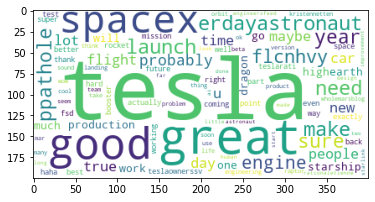

In [110]:
wc = WordCloud(background_color='white', max_words=100,stopwords=stop).generate(clean_tweets_joined)
plt.imshow(wc)

# Named Entity Recognition and Parts of Speech

In [111]:
nlp = spacy.load('en_core_web_sm')

In [112]:
x = nlp(clean_tweets_joined)

In [114]:
displacy.render(x, style='ent')

In [116]:
for i in x:
    print(i, '-',i.pos_)

alien - PROPN
idaacarmack - PROPN
ray - PROPN
tracing - VERB
cyberpunk - NOUN
hdr - NOUN
nextlevel - NOUN
have - AUX
tried - VERB
great - ADJ
interview - NOUN
gtera27 - NOUN
doge - PROPN
underestimated - VERB
teslacn - PROPN
congratulation - PROPN
tesla - PROPN
china - PROPN
amazing - ADJ
execution - NOUN
last - ADJ
year - NOUN
now - ADV
next - ADV
even - ADV
happy - ADJ
new - ADJ
year - NOUN
ox - NOUN
underdoge - NOUN
all - DET
thought - NOUN
would - AUX
fail - VERB
himself - PRON
haha - ADP
thanks - NOUN
indeed - ADV
tweet - PROPN
definitely - ADV
represent - VERB
realworld - PROPN
time - NOUN
allocationthe - PROPN
entertaining - ADJ
outcome - NOUN
likely - ADV
givedirectly - ADV
just - ADV
sent - VERB
somejust - ADJ
agree - ADJ
clubhouse - NOUN
tco3rwe9uhstsgeoffkeighley - PROPN
it - PRON
getting - AUX
realbought - VERB
dogecoin - NOUN
lil - NOUN
x - PUNCT
toddler - PROPN
hodler - PROPN
joshmanmode - PROPN
he - PRON
definitely - ADV
issue - VERB
sentencing - NOUN
seems - VERB
bit - 

next - ADJ
year - NOUN
aiming - VERB
release - NOUN
candidate - NOUN
desig - NOUN
made - VERB
video - NOUN
aoc - NOUN
absolutely - ADV
nasaspaceflight - ADV
unlike - SCONJ
aircraft - NOUN
division - NOUN
fine - ADJ
faa - NOUN
space - NOUN
division - NOUN
fundamentally - ADV
broken - VERB
reg - PROPN
nomad - PROPN
anbuteau - PROPN
u0001f917 - PROPN
the - DET
esthetic - ADJ
cyberpunk - NOUN
incredible - ADJ
btw - NOUN
the - DET
interior - ADJ
design - NOUN
u0001f44c - ADV
major - ADJ
esthetic - ADJ
improvement - NOUN
coming - VERB
teslaownerssv - ADV
a - DET
little - ADJ
dmcryan - ADJ
new - ADJ
roadster - NOUN
part - NOUN
rocket - NOUN
dmcryan - PROPN
there - PRON
storage - VERB
easily - ADV
upgradable - ADJ
avalonpenrose - VERB
247teslanews - PROPN
yeah - INTJ
probably - ADV
month - NOUN
wholemarsblog - ADJ
after - ADP
drive - NOUN
without - ADP
using - VERB
prnd - PROPN
stalk - PROPN
stick - PROPN
day - NOUN
get - VERB
annoying - ADJ
go - VERB
back - ADV
use - VERB
shifter - ADJ
wholem

good - ADJ
year - NOUN
agree - VERB
let - VERB
u - PRON
make - VERB
wa - AUX
also - ADV
thinking - VERB
spacex - PROPN
boca - PROPN
hold - VERB
fun - NOUN
party - NOUN
give - VERB
tour - NOUN
community - NOUN
time - NOUN
time - NOUN
erdayastronaut - NOUN
super - ADJ
support - NOUN
public - ADJ
space - NOUN
around - ADP
production - NOUN
launch - NOUN
site - NOUN
wherever - SCONJ
done - VERB
that - PRON
sean18743005 - NOUN
catapult - VERB
high - ADJ
air - NOUN
land - NOUN
roof - NOUN
base - NOUN
jumping - NOUN
parachute - NOUN
way - NOUN
travel - NOUN
that - PRON
actually - ADV
restaurant - NOUN
spacex - VERB
building - VERB
futuristic - ADJ
bar - NOUN
top - ADJ
h - NOUN
and - CCONJ
increase - VERB
fun - NOUN
hopefully - ADV
me - PRON
neither - CCONJ
tonychomrmagic - ADJ
one - NUM
best - ADJ
tesla - NOUN
solar - ADJ
roof - NOUN
installation - NOUN
91demigod - PROPN
no - INTJ
maybe - ADV
one - NUM
day - NOUN
ppathole - PROPN
would - AUX
best - ADV
way - VERB
a - DET
large - ADJ
solar - A

appreciated - ADJ
deepmind - NOUN
frictionless - NOUN
ai - VERB
what - PRON
could - AUX
possibly - ADV
go - VERB
wrong - ADJ
good - ADJ
idea - NOUN
wintonark - NOUN
during - ADP
darkest - ADJ
day - NOUN
model - NOUN
3 - NUM
program - NOUN
reached - VERB
tim - PROPN
cook - PROPN
discus - NOUN
possibility - NOUN
strange - ADJ
true - ADJ
tesla - NOUN
already - ADV
us - PRON
ironphosphate - NOUN
medium - ADJ
range - NOUN
car - NOUN
made - VERB
shanghai - PROPN
facto - X
sparta - PROPN
reply - PROPN
macedon - PROPN
lizclaman - PROPN
hi - INTJ
liz - PROPN
thanks - NOUN
everyone - PRON
worked - VERB
hard - ADV
make - VERB
tesla - NOUN
successful - ADJ
my - PRON
heart - NOUN
go - VERB
indeed - ADV
kristennetten - VERB
it - PRON
seriously - ADV
twisted - VERB
affair - NOUN
end - VERB
well - INTJ
they - PRON
although - SCONJ
kind - ADJ
lowkey - PROPN
tesla - NOUN
supercharger - NOUN
made - VERB
accessible - ADJ
electric - ADJ
carsrt - NOUN
photo - NOUN
yesterday - NOUN
launch - NOUN
landing - NO

video - NOUN
control - NOUN
the - DET
biggest - ADJ
gamechanger - NOUN
cu - X
fsd - PROPN
beta - PROPN
5 - NUM
coming - VERB
day - NOUN
improvement - NOUN
significant - ADJ
exciting - ADJ
mission - NOUN
vincent13031925 - PROPN
wow - ADP
livboeree - NOUN
yeatomorrow - NOUN
7th - ADJ
flight - NOUN
rocket - NOUN
landing - NOUN
droneship - NOUN
of - ADP
course - NOUN
still - ADV
love - VERB
you - PRON
johnnacrider1 - PROPN
sure - ADJ
futurejurvetson - NOUN
true - ADJ
rationaletienne - NOUN
we - PRON
quiet - ADJ
queue - NOUN
product - NOUN
build - VERB
better - ADJ
new - ADJ
roadster - NOUN
point - NOUN
u0001f62c - PROPN
fate - NOUN
love - NOUN
irony - NOUN
hate - VERB
hypocrisyrt - NOUN
booster - NOUN
separation - NOUN
secondengine - NOUN
start - VERB
fairing - VERB
separation - NOUN
u - PROPN
s - PROPN
european - PROPN
sentinel - PROPN
6 - NUM
michael - PROPN
freilich - PROPN
oceanobserving - VERB
icannotenough - PROPN
u0001f603 - PROPN
our - PRON
data - NOUN
center - NOUN
named - VERB
sk

first - ADJ
operational - ADJ
mission - NOUN
astronaut - PROPN
board - PROPN
u2192 - PROPN
okrt - VERB
all - DET
system - NOUN
go - VERB
tonight - NOUN
launch - VERB
727 - NUM
p - NOUN
est - ADJ
crew - NOUN
dragon - NOUN
first - ADJ
operational - ADJ
mission - NOUN
four - NUM
astronaut - PROPN
boa - PROPN
klotzadam - PROPN
yeah - INTJ
feel - VERB
pretty - ADV
normal - ADJ
no - DET
symptom - NOUN
right - ADV
last - ADJ
week - NOUN
sym - PROPN
doing - VERB
test - NOUN
several - ADJ
different - ADJ
lab - NOUN
time - NOUN
day - NOUN
administered - VERB
rn - ADP
both - PRON
obv - VERB
insanely - ADV
great - ADJ
bad - ADJ
pointless - ADJ
argumentastronaut - NOUN
launch - NOUN
today - NOUN
u0001f338 - PROPN
message - NOUN
boy - NOUN
girl - NOUN
japan - PROPN
space - PROPN
waiting - VERB
in - ADP
spotlight - NOUN
astronaut - PROPN
sort - ADV
this - DET
week - NOUN
u0001f680 - PROPN
nasa - PROPN
crew - NOUN
1 - NUM
astronaut - NOUN
arrive - NOUN
ahead - ADV
launch - NOUN
u0001f534 - PROPN
our -

soon - ADV
u2660 - VERB
ufe0f - NOUN
u2660 - X
ufe0f - NOUN
tesla - NOUN
autopilot - NOUN
ai - VERB
team - NOUN
u2660 - AUX
ufe0f - NOUN
u2660 - X
ufe0f - NOUN
good - ADJ
explanation - NOUN
4d - PROPN
essential - ADJ
dynamically - ADV
occluded - VERB
object - VERB
especially - ADV
large - ADJ
intersection - NOUN
phantom - ADJ
opera - NOUN
is - AUX
inside - ADP
mind - NOUN
linustech - PROPN
u0001f1e8 - PROPN
u0001f1e6 - PROPN
u0001f600 - PROPN
just - ADV
looking - VERB
problemsolvers - NOUN
get - VERB
thing - NOUN
done - VERB
high - ADJ
sense - NOUN
urgency - NOUN
don - PROPN
care - PROPN
went - VERB
schoolwhen - ADV
sending - VERB
resume - NOUN
please - INTJ
describe - VERB
hardest - ADJ
problem - NOUN
solved - VERB
exactly - ADV
solved - VERB
thema - PROPN
new - ADJ
banner - NOUN
needed - VERB
neither - CCONJ
hard - ADV
left - VERB
right - ADJ
ppathole - NOUN
another - DET
fine - ADJ
day - NOUN
simulation - NOUN
nereide - PROPN
faraday - PROPN
invented - VERB
electric - ADJ
motor - PR

upgra - NOUN
all - PRON
left - VERB
broken - ADJ
bot - NOUN
equipment - NOUN
hardly - ADV
worth - ADJ
scrap - NOUN
metal - NOUN
value - NOUN
but - CCONJ
scrounged - VERB
spa - NOUN
and - CCONJ
actually - ADV
zero - NUM
employee - NOUN
factory - NOUN
gm - PROPN
toyota - PROPN
left - VERB
they - PRON
took - VERB
good - ADJ
equipment - NOUN
bettern - NOUN
nothin - NOUN
ur - PROPN
u0001f4b0 - ADJ
back - PROPN
wholemarsblog - PROPN
u0001f4ab - PROPN
u0001f6f0 - PROPN
tesla - PROPN
team - NOUN
done - VERB
great - ADJ
work - NOUN
hyperchangetv - NOUN
well - NOUN
tbh - NOUN
capex - NOUN
efficiency - PROPN
2017 - NUM
trash - NOUN
u0001f62c - PROPN
testing - NOUN
covid - ADJ
license - NOUN
print - NOUN
money - PROPN
arctechinc - PROPN
helpful - ADJ
thanks - NOUN
beta - NOUN
tester - NOUN
erdayastronaut - NOUN
video - NOUN
training - NOUN
inference - NOUN
essential - ADJ
excellent - ADJ
autonomy - NOUN
engineersfeed - NOUN
sigh - PROPN
new - ADJ
supersonic - ADJ
jet - NOUN
time - NOUN
electric - 

flag - VERB
mar - PROPN
tashaark - PROPN
additive - ADJ
manufacturing - VERB
part - NOUN
still - ADV
far - ADV
costly - ADJ
car - NOUN
rapidly - ADV
create - VERB
tooling - NOUN
accel - NOUN
pretty - ADV
much - ADV
think - NOUN
may - AUX
end - VERB
high - ADJ
notert - NOUN
starman - NOUN
last - ADV
seen - VERB
leaving - VERB
earth - NOUN
made - VERB
first - ADJ
close - ADJ
approach - NOUN
mar - PROPN
today - NOUN
 - NOUN
within - ADP
005 - NUM
astronomical - ADJ
unit - NOUN
5 - NUM
mill - NOUN
evhq2 - NOUN
meant - VERB
say - VERB
fixed - VERB
latest - ADJ
wide - ADJ
release - NOUN
won - VERB
need - AUX
wait - VERB
fsd - NOUN
it - PRON
franktinsley - VERB
exactly - ADV
we - PRON
barked - VERB
tree - NOUN
way - NOUN
long - ADJ
sigh - NOUN
give - VERB
false - ADJ
sense - NOUN
play - VERB
sexy - ADJ
snake - NOUN
jazz - NOUN
ppathole - PROPN
yeah - INTJ
provided - VERB
metal - NOUN
gear - NOUN
snake - NOUN
autocoupler - NOUN
tashaark - PROPN
waymo - PROPN
impressive - ADJ
highly - ADV
spec

crew - NOUN
dragon - NOUN
first - ADJ
operational - ADJ
mission - NOUN
astronaut - PROPN
board - PROPN
spacex - VERB
launch - NOUN
21st - NOUN
cargo - NOUN
resupply - ADV
mi - ADJ
samtalkstesla - ADJ
maybe - ADV
used - VERB
many - ADJ
magenta - NOUN
spotlightsrt - NOUN
news - NOUN
we - PRON
targeting - VERB
240 - NUM
et - NOUN
saturday - PROPN
oct - PROPN
31 - NUM
launch - NOUN
crew - NOUN
1 - NUM
mission - NOUN
send - VERB
ast - ADP
valaafshar - NOUN
having - VERB
low - ADJ
center - NOUN
gravity - NOUN
make - VERB
world - NOUN
difference - NOUN
safety - NOUN
vmone1 - NOUN
we - PRON
probably - ADV
ipo - VERB
starlink - NOUN
several - ADJ
year - NOUN
future - NOUN
revenue - NOUN
growth - NOUN
fate - NOUN
loooves - NOUN
irony - NOUN
waemd - PROPN
glad - ADJ
spacex - PROPN
could - AUX
help - VERB
we - PRON
prioritizing - VERB
emergency - NOUN
responder - NOUN
location - NOUN
internet - NOUN
connectivity - NOUN
true - ADJ
teslavibes - NOUN
that - SCONJ
total - ADJ
market - NOUN
tesla - NOU

numbersof - VERB
course - NOUN
still - ADV
love - VERB
deborahpatteri - PROPN
sure - ADJ
planet - NOUN
good - ADJ
movie - NOUN
erdayastronaut - NOUN
current - ADJ
strong - ADJ
droneship - NOUN
hold - VERB
station - NOUN
thruster - NOUN
upgraded - VERB
future - ADJ
mission - NOUN
lot - NOUN
happened - VERB
13 - NUM
year - NOUN
teslarati - NOUN
it - PRON
insanespeedrunning - VERB
factorio - NOUN
real - PROPN
life - PROPN
cleantechnica - PROPN
no - INTJ
make - VERB
great - ADJ
point - NOUN
important - ADJ
note - NOUN
iron - NOUN
cost - NOUN
advantage - NOUN
partly - ADV
offset - VERB
yupfallout - NOUN
shelter - NOUN
tesla - NOUN
tap - NOUN
entertainment - NOUN
button - NOUN
implicit - ADJ
conflation - NOUN
consumption - NOUN
capital - NOUN
allocation - NOUN
foundational - ADJ
error - NOUN
kristennetten - VERB
great - ADJ
idea - NOUN
u0001f5a4 - PROPN
fallout - PROPN
radio - NOUN
u0001f5a4 - PROPN
there - ADV
eerie - VERB
parallel - VERB
the - DET
boring - VERB
company - NOUN
vaulttec - AD

falcon - NOUN
9 - NUM
first - ADJ
stage - NOUN
land - NOUN
landing - NOUN
zone - NOUN
1 - NUM
complete - ADJ
booster - NOUN
fourth - ADJ
flight - NOUN
yeah - INTJ
ppathole - PROPN
lhc - NOUN
tbh - PROPN
tcoovaohsg1ofnigellockyer - PROPN
if - SCONJ
ever - ADV
want - VERB
build - VERB
long - ADJ
accelerator - NOUN
tunnel - NOUN
straight - ADJ
circular - ADJ
know - NOUN
peoplert - NOUN
after - ADP
launching - VERB
saocom - NOUN
1b - PROPN
two - NUM
rideshare - VERB
payload - NOUN
orbit - NOUN
falcon - PROPN
9 - NUM
first - ADJ
stage - NOUN
return - NOUN
earth - NOUN
land - NOUN
landing - VERB
zonrt - PROPN
deployment - NOUN
saocom - NOUN
1b - PROPN
confirmed - VERB
falcon - PROPN
9 - NUM
first - ADJ
stage - NOUN
landed - VERB
landing - VERB
zone - NOUN
1 - NUM
liftoff - PROPN
coolrt - ADJ
snout - PROPN
boops - PROPN
physic - PROPN
law - NOUN
everything - PRON
else - ADV
recommendation - NOUN
samtalkstesla - ADJ
if - SCONJ
company - NOUN
solved - VERB
useful - ADJ
thing - NOUN
buy - VERB
w

snake - NOUN
jazz - NOUN
u0001f40d - PROPN
u0001f3b7 - ADV
it - PRON
quite - ADV
hard - ADV
u - NOUN
write - NOUN
software - NOUN
needed - VERB
cover - VERB
basic - ADJ
car - NOUN
functionality - NOUN
maybe - ADV
c - NOUN
sound - NOUN
like - ADP
simon - PROPN
garfunkel - PROPN
lyricsbureaucracy - PROPN
inherently - ADV
kafkaesque - NOUN
tesmaniancom - NOUN
dankeschön - PROPN
brandenburg - PROPN
grünheide - PROPN
harsimranbansal - PROPN
true - ADJ
u0001f446 - PROPN
medical - ADJ
check - NOUN
aok - NOUN
might - AUX
run - VERB
president - NOUN
2024 - NUM
not - PART
long - ADJ
chain - NOUN
hydrocarbon - NOUN
lowering - VERB
preburner - NOUN
combustion - NOUN
temperature - NOUN
make - VERB
big - ADJ
difference - NOUN
everydayelon - NOUN
wholemarsblog - NOUN
daniellefong - PROPN
absolutely - ADV
need - VERB
liquid - NOUN
cooling - VERB
we - PRON
applying - VERB
experience - NOUN
that - PRON
error - NOUN
canada - PROPN
the - DET
lease - NOUN
payment - NOUN
specifically - ADV
lower - ADJ
loan 

mounting - VERB
method - NOUN
need - VERB
bigger - ADJ
section - NOUN
tile - NOUN
see - NOUN
hold - VERB
new - ADJ
alloy - NOUN
test - NOUN
tank - NOUN
taken - VERB
burst - NOUN
pressure - NOUN
sn8 - ADJ
body - NOUN
flap - NOUN
noseconesn - PROPN
5 - NUM
6 - NUM
starship - NOUN
production - NOUN
complex - NOUN
texas - PROPN
one - NUM
day - NOUN
soon - ADV
wear - VERB
outfit - NOUN
trying - VERB
channel - NOUN
herb - NOUN
tarlek - NOUN
wkrp - PROPN
note - VERB
fabulous - ADJ
plaid - NOUN
jacket - NOUN
gingham - PROPN
shirt - PROPN
combo - PROPN
twin - PROPN
peak - PROPN
samtalkstesla - ADJ
working - VERB
mom - NOUN
cousin - NOUN
farm - PROPN
saskatchewan - PROPN
age - NOUN
17 - NUM
think - VERB
barnraising - VERB
day - NOUN
not - PART
sure - ADJ
yet - ADV
hopefully - ADV
will - AUX
need - VERB
leg - NOUN
repair - NOUN
probably - ADV
sn6 - NOUN
fly - VERB
sn5 - NOUN
we - PRON
need - VERB
clearlyrt - NOUN
spot - VERB
tiny - ADJ
human - NOUN
this - DET
shot - NOUN
really - ADV
put - VERB
s

flying - NOUN
would - AUX
burned - VERB
stake - NOUN
witchcraft - NOUN
long - ADV
ago - ADV
engineersfeed - VERB
engineering - NOUN
magic - NOUN
made - VERB
real - ADJ
janeidyeve - NOUN
lo - PROPN
que - PROPN
construimos - PROPN
cool - PROPN
tco8lpvwbec4rstarship - PROPN
sn5 - NOUN
completed - VERB
full - ADJ
duration - NOUN
static - ADJ
fire - NOUN
150 - NUM
m - NOUN
hop - PROPN
soon - ADV
u0001f5a4 - PROPN
u0001f9db - PROPN
u200d - PROPN
u2640 - ADJ
ufe0f - PROPN
total - ADJ
eclipse - NOUN
heart - NOUN
u0001f9db - ADP
u200d - PROPN
u2640 - ADJ
ufe0f - PROPN
u0001f5a4 - NOUN
u0001f62e - PROPN
not - PART
aware - ADJ
ppathole - PROPN
could - AUX
also - ADV
extend - VERB
range - NOUN
hearing - NOUN
beyond - ADP
normal - ADJ
frequency - NOUN
amplitude - NOUN
deus - PROPN
ex - PROPN
neuralinks - NOUN
currently - ADV
meant - VERB
mature - ADJ
brain - NOUN
functionality - NOUN
lost - VERB
remo - NOUN
possible - ADJ
create - VERB
neural - ADJ
shunt - PROPN
motor - NOUN
cortex - NOUN
microcont

top - ADJ
mark - NOUN
safety - NOUN
organization - PROPN
north - PROPN
america - PROPN
europe - PROPN
australia - PROPN
will - AUX
discus - VERB
we - PRON
d - ADJ
earnings - NOUN
call - NOUN
lot - NOUN
talk - VERB
stephenpallotta - PROPN
hiromichimizuno - PROPN
this - PRON
look - VERB
cool - ADJ
ppathole - PROPN
it - PRON
potential - ADJ
maxxrpbtc - NOUN
good - ADJ
article - NOUN
it - PRON
really - ADV
set - VERB
tour - NOUN
maybe - ADV
astrobehnken - VERB
manufactured - VERB
5 - NUM
min - NOUN
lax - NOUN
waitbutwhy - ADV
some - PRON
contribute - VERB
y - PROPN
chromosome - NOUN
mitochondrion - NOUN
constant - NOUN
except - SCONJ
mutation - NOUN
kristennetten - VERB
that - SCONJ
one - NUM
part - NOUN
surgery - NOUN
for - ADP
scale - NOUN
must - AUX
fully - ADV
automated - VERB
like - ADP
lasikthis - PROPN
would - AUX
solve - VERB
lot - NOUN
brain - NOUN
spine - NOUN
injury - NOUN
ultimately - ADV
essential - ADJ
ai - VERB
symbiosis - NOUN
fermatslibrary - PROPN
fermi - PROPN
awesome - 

# Emotion Mining - Sentiment Analysis

In [118]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [120]:
sentences_df = pd.DataFrame(sentences,columns = ['sentence'])
sentences_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


### Emotion Lexicon - Affin

In [126]:
affin=pd.read_csv('C:\\Users\\krush\\Desktop\\Data Science\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [127]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [128]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

In [129]:
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

### Calculating sentiment value for each sentence

In [131]:
calculate_sentiment(text='great')

3

In [134]:
sentences_df['sentiment_value']=sentences_df['sentence'].apply(calculate_sentiment)
sentences_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [136]:
sentences_df['word_count']=sentences_df['sentence'].str.split().apply(len)
sentences_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [138]:
sentences_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [140]:
sentences_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [143]:
# Negetive Sentiment Score
sentences_df[sentences_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [144]:
# Positive Sentiment Score
sentences_df[sentences_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [145]:
sentences_df['index']=range(0,len(sentences_df))
sentences_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


### Visualization

C:\Users\krush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

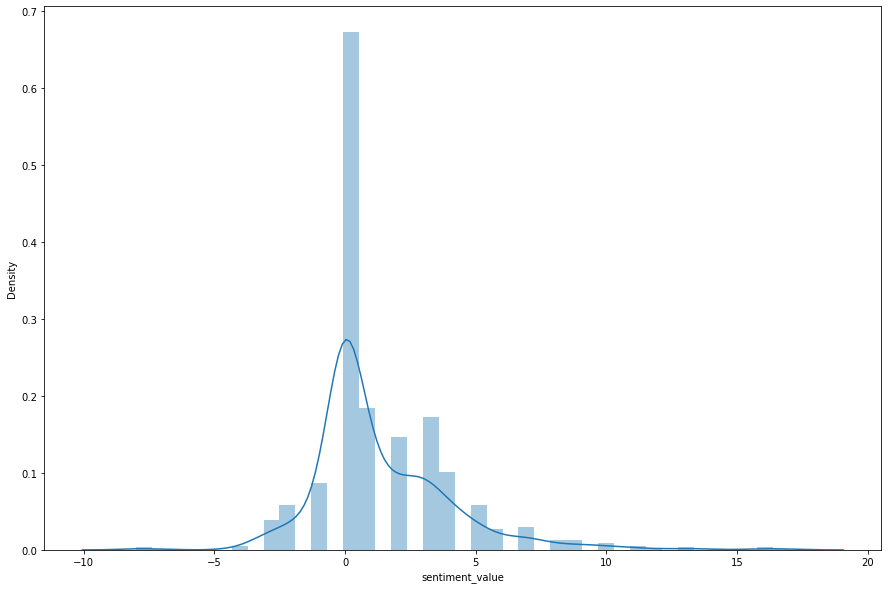

In [147]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sentences_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

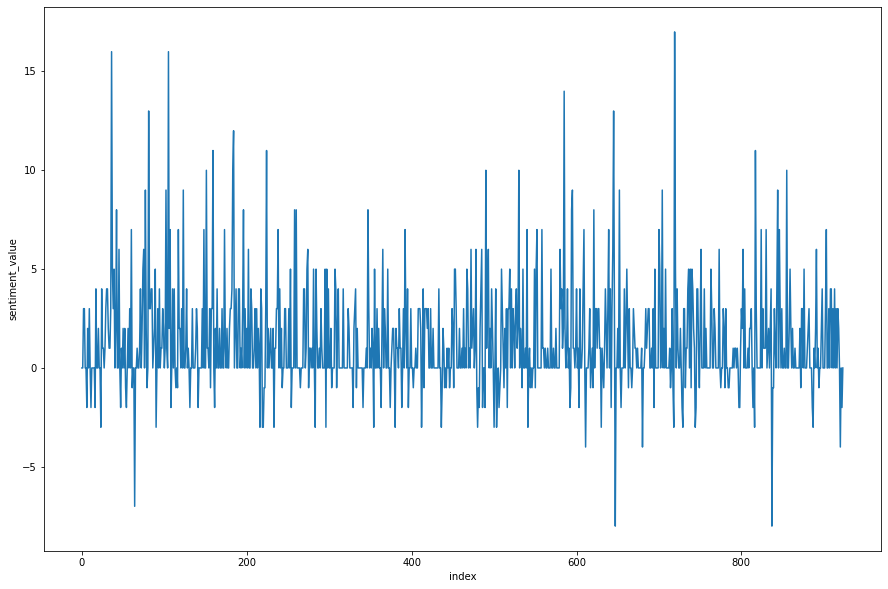

In [148]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentences_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

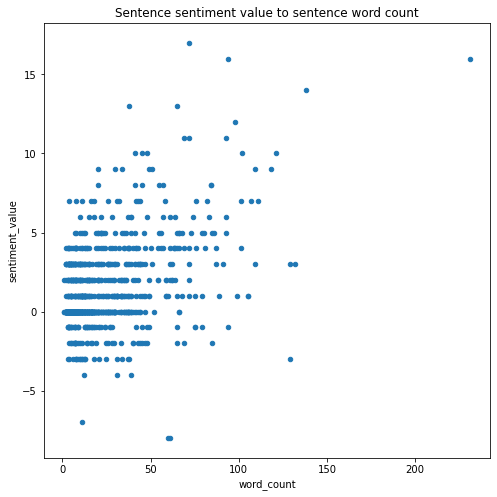

In [151]:
sentences_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

#### Conclusion
Number of positive tweets are more than number of negative tweets

## End